In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
auctions = pd.read_csv('../data/auctions.csv.gzip',compression='gzip',\
                        usecols=['date','device_id','platform','ref_type_id','source_id'],\
                        dtype={'device_id':'int64','platform':'category','ref_type_id':'category','source_id':'category'},\
                        parse_dates=['date'])

In [3]:
clicks = pd.read_csv('../data/clicks.csv.gzip',compression='gzip', parse_dates=['created'])
clicks.describe(include = 'all').transpose().head()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
advertiser_id,26351,NaN,NaN,NaN,NaN,NaN,2.99199,0.16407,0,3,3,3,8
action_id,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_id,26351,NaN,NaN,NaN,NaN,NaN,1.24527,2.18895,0,0,0,1,10
created,26351,26347,2019-03-10 05:02:10.703000,2,2019-03-05 01:17:30.663000,2019-03-13 23:59:59.298000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,26351,NaN,NaN,NaN,NaN,NaN,6.3336e+18,1024.02,6.3336e+18,6.3336e+18,6.3336e+18,6.3336e+18,6.3336e+18


In [4]:
clicks.dtypes

advertiser_id               int64
action_id                 float64
source_id                   int64
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection              bool
carrier_id                float64
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand                 int64
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                    int64
ref_hash                    int64
dtype: object

In [5]:
clicks = pd.read_csv('../data/clicks.csv.gzip',compression='gzip',\
                     parse_dates=['created'],\
                     dtype={'action_id':'category',\
                            'source_id':'category',\
                            'carrier_id':'category',\
                            'source_id':'category'})

In [6]:
clicks.dtypes

advertiser_id               int64
action_id                category
source_id                category
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection              bool
carrier_id               category
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand                 int64
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                    int64
ref_hash                    int64
dtype: object

In [7]:
print('Fecha Max: ', clicks['created'].max())
print('Fecha Min: ', clicks['created'].min())

Fecha Max:  2019-03-13 23:59:59.298000
Fecha Min:  2019-03-05 01:17:30.663000


In [8]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [9]:
clicks.shape

(26351, 20)

In [10]:
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [11]:
clicks['specs_brand'].value_counts()

392184377613098015     16172
2733035977666442898    10164
8930605132947907029       10
3855167788531275156        4
5675295985273558497        1
Name: specs_brand, dtype: int64

* **acttion_id:** Es siempre null
* **wifi_connection**: Es siempre False
* **country_id:** Es siempre null

---
# Sources 

Un Source es cada uno de los proveedores de encuestas que utiliza Jaamp.

## ¿Cuantos Sources hay? ¿Que porcion representa del negocio ?

Se revisa la cantidad de clicks por source

In [12]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

Text(0.5,0,'Source')

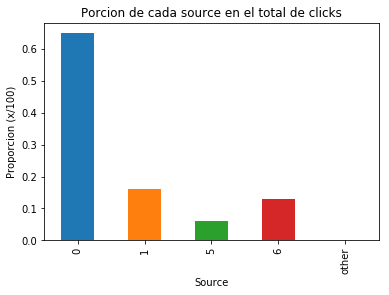

In [13]:
#Cantidad minima de data para ser representativo
clicks['source_id'] = clicks.groupby('source_id')['source_id'].transform(lambda x: 'other' if len(x) < 100 else x)

plot = (clicks.groupby('source_id')['source_id'].count() / len(clicks)).apply(lambda x: round(x, 2)).plot(kind='bar')
plot.set_title('Porcion de cada source en el total de clicks')
plot.set_ylabel('Proporcion (x/100)')
plot.set_xlabel('Source')

---
# TimeToClick

## Cuanto se tarda en hacer click?

In [14]:
print(len(clicks['timeToClick'].unique()))
print(clicks['timeToClick'].mean())
print(clicks['timeToClick'].median())

17295
230.40330948339644
10.588


17951


c:\users\lt5420\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Retardo X(Seg.)')

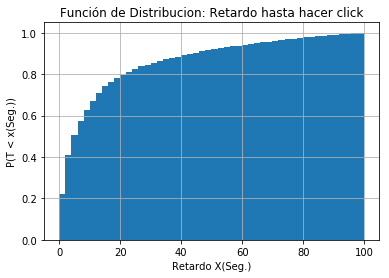

In [18]:
times = clicks.loc[clicks['timeToClick'] < 100]
print(len(times))
plot = times['timeToClick'].hist(bins=50, normed=True, cumulative=True)
plot.set_title('Función de Distribucion: Retardo hasta hacer click')
plot.set_ylabel('P(T < x(Seg.))')
plot.set_xlabel('Retardo X(Seg.)')

c:\users\lt5420\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Retardo (Seg.)')

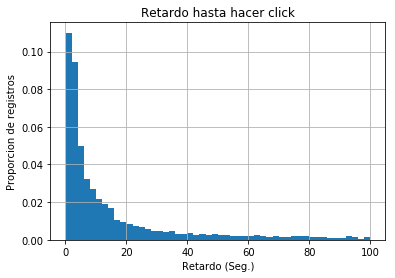

In [17]:
plot = times['timeToClick'].hist(bins=50, normed=True)
plot.set_title('Retardo hasta hacer click')
plot.set_ylabel('Proporcion de registros')
plot.set_xlabel('Retardo (Seg.)')